### Basic Statistics - Measures of Central Tendencies and Variance
#### Name: Omkar Gaikwad
#### RollNo: 31126
Perform the following operations on any open source dataset (eg. data.csv)
1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for
a dataset (age, income etc.) with numeric variables grouped by one of the qualitative
(categorical) variable. For example, if your categorical variable is age groups and
quantitative variable is income, then provide summary statistics of income grouped by the
age groups. Create a list that contains a numeric value for each response to the categorical
variable.
2. Write a Python program to display some basic statistical details like percentile, mean,
standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-versicolor’
of iris.csv dataset.
Provide the codes with outputs and explain everything that you do in this step.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 1 (NBA dataset)

In [2]:
# Load the data
nba_raw = pd.read_csv('nba.csv')

nba_raw.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [3]:
# Get the details of all the columns
nba_raw.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

Thus a combination of Objects (Strings) and float values are present in the data.

### Data Preprocessing

In [4]:
# Find whether the data contains null values
nba_raw.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

It is observed that most of the columns contain only 1 missing value. These will be removed first so that they don't affect the rest of the data.

In [5]:
# First drop the rows with only 1 value missing
nba_raw = nba_raw.dropna(subset=['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight'])

nba_raw.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
# Now, we will replace the NaN values of College with mode and Salary with mean value
college_mode = nba_raw['College'].mode()[0]
salary_mean = nba_raw['Salary'].mean()

nba_raw['College'].fillna(college_mode, inplace=True)
nba_raw['Salary'].fillna(salary_mean, inplace=True)

print("Modal college is: ", college_mode)
print("Mean salary is: ", salary_mean)

Modal college is:  Kentucky
Mean salary is:  4842684.105381166


In [7]:
# Check again for Null values
nba_raw.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

Thus all the null values have been removed from the dataset.

## Grouping the data

In [8]:
# Get all the team names and store them in a list
team_list = nba_raw['Team'].unique()

team_list

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

As observed above, a large number of teams are present in the data. We will try to group the data based on teams, to see the attributes of players from different teams (Like Weight, Salary etc). 

In [12]:
# Group by Team
nba_teams = nba_raw.groupby('Team')
# # This variable will be used to limit the number of teams that are disaplyed
teams = 0

# This is used to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# For name of the group and each group
for name, group in nba_teams:
    # Print only the first 3 teams
    if teams >= 3:
        break
    print("Team Name: ", name)
    
    # Get a detailed statistical info about players of each team
    print(group.describe(), "\n\n")
    teams += 1

Team Name:  Atlanta Hawks
       Number   Age  Weight      Salary
count   15.00 15.00   15.00       15.00
mean    19.00 28.20  221.27  4860196.67
std     11.48  4.23   25.98  5194508.14
min      0.00 22.00  172.00   525093.00
25%     11.50 24.00  203.00  1152260.00
50%     17.00 27.00  225.00  2854940.00
75%     25.50 31.00  242.50  6873239.50
max     43.00 35.00  260.00 18671659.00 


Team Name:  Boston Celtics
       Number   Age  Weight      Salary
count   15.00 15.00   15.00       15.00
mean    31.87 24.73  219.47  4225583.47
std     30.30  2.84   25.61  3036395.96
min      0.00 20.00  180.00  1148640.00
25%      9.50 22.00  197.50  1994760.00
50%     28.00 25.00  220.00  3425510.00
75%     42.50 27.00  236.50  5898058.50
max     99.00 29.00  260.00 12000000.00 


Team Name:  Brooklyn Nets
       Number   Age  Weight      Salary
count   15.00 15.00   15.00       15.00
mean    18.27 25.60  215.60  3501898.33
std     14.10  3.02   24.38  5317816.85
min      0.00 21.00  175.00   13421

**Observations**

It is observed that:

- The mean salary of players playing in Atalanta Hawks is higher than the other two. 

- However, the maximum salary is offered by Brooklyn Nets.

- The large standard deviation of Salaries in Atalanta Hawks indicates that their is a disparity in player salaries between the players at the same team.

In [11]:
# Store the Grouped data into a list
team_salary_list = list(nba_teams['Salary'])

team_salary_list

[('Atlanta Hawks',
  309    2000000.00
  310    1304520.00
  311    2854940.00
  312   12000000.00
  313    1000000.00
  314    5746479.00
  315   18671659.00
  316     947276.00
  317     525093.00
  318    1763400.00
  319    3333333.00
  320    4000000.00
  321    9756250.00
  322    1000000.00
  323    8000000.00
  Name: Salary, dtype: float64),
 ('Boston Celtics',
  0     7730337.00
  1     6796117.00
  2     4842684.11
  3     1148640.00
  4     5000000.00
  5    12000000.00
  6     1170960.00
  7     2165160.00
  8     1824360.00
  9     3431040.00
  10    2569260.00
  11    6912869.00
  12    3425510.00
  13    1749840.00
  14    2616975.00
  Name: Salary, dtype: float64),
 ('Brooklyn Nets',
  15    3425510.00
  16     845059.00
  17    1500000.00
  18    1335480.00
  19    6300000.00
  20    1599840.00
  21     134215.00
  22    1500000.00
  23   19689000.00
  24    1140240.00
  25     947276.00
  26     981348.00
  27     947276.00
  28     947276.00
  29   11235955.00
  Name

In [12]:
# Group By Position
nba_pos = nba_raw.groupby('Position')

# Print the Position, Age and Salary
for name, group in nba_pos:
    print("Position: ", name)
    print(group[['Age', 'Salary']].describe(), "\n\n")

Position:  C
        Age      Salary
count 78.00       78.00
mean  27.37  5967052.00
std    4.16  5787988.91
min   20.00    83397.00
25%   24.00  1328880.00
50%   27.00  3811060.00
75%   30.00  9620558.25
max   40.00 22359364.00 


Position:  PF
         Age      Salary
count 100.00      100.00
mean   27.16  4570889.02
std     4.61  4727010.29
min    20.00   111444.00
25%    24.00  1123722.25
50%    27.00  3000000.00
75%    30.00  5543725.00
max    40.00 22192730.00 


Position:  PG
        Age      Salary
count 92.00       92.00
mean  26.85  5067605.52
std    4.17  4939767.97
min   20.00    55722.00
25%   24.00  1448610.00
50%   26.50  3106518.00
75%   30.00  7000000.00
max   40.00 21468695.00 


Position:  SF
        Age      Salary
count 85.00       85.00
mean  26.86  4857219.53
std    4.39  5975996.94
min   20.00    30888.00
25%   23.00  1000000.00
50%   26.00  2041080.00
75%   29.00  5500000.00
max   38.00 25000000.00 


Position:  SG
         Age      Salary
count 102.00      102

**Observations**

- The players who play in the Center (C) have the highest mean salary.

- The maximum salary is paid to Small Forward (SF).

- Interestingly, the lowest salary is also paid to a Small Forward ($31,000).

- The mean age of players in each position is almost similar (27 years).

## Visualization

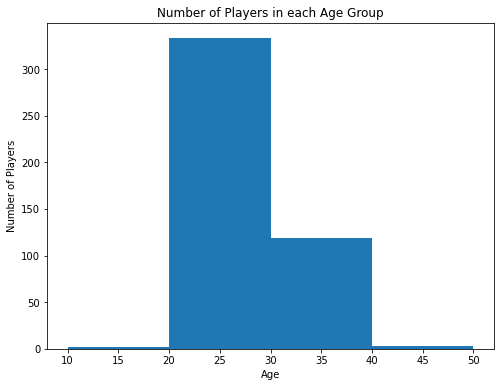

In [14]:
# Plot a histogram to show distribution of Age of the players

bins = [x*10 for x in range(1,6)]

plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain')

plt.hist(nba_raw['Age'],bins=bins)

plt.title("Number of Players in each Age Group")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()

In [15]:
# Print the maximum and minimum values of Age
print("The Maximum age of players in NBA is: ", nba_raw['Age'].max())
print("The Minimum age of players in NBA is: ", nba_raw['Age'].min())

The Maximum age of players in NBA is:  40.0
The Minimum age of players in NBA is:  19.0


## Creating Age Groups

In [16]:
# Creating intervals of Ages 

bins = [10, 20, 30, 40, 50]
labels = ['10-19', '20-29', '30-39', '40-49']

nba_data = nba_raw.copy()

nba_data['age_group'] = pd.cut(nba_raw['Age'], bins=bins, labels=labels, right=False)

nba_data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,age_group
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6-2,180.00,Texas,7730337.00,20-29
1,Jae Crowder,Boston Celtics,99.00,SF,25.00,6-6,235.00,Marquette,6796117.00,20-29
2,John Holland,Boston Celtics,30.00,SG,27.00,6-5,205.00,Boston University,4842684.11,20-29
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6-5,185.00,Georgia State,1148640.00,20-29
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6-10,231.00,Kentucky,5000000.00,20-29


In [17]:
# Group by age_group
nba_grouped_age = nba_data.groupby('age_group')

for name, group in nba_grouped_age:
    print("\nAge Group: ", name)
    print(group.describe().loc[['mean', 'std', 'min', 'max']][['Weight', 'Salary']])


Age Group:  10-19
      Weight     Salary
mean  204.00 1930440.00
std     2.83  279165.76
min   202.00 1733040.00
max   206.00 2127840.00

Age Group:  20-29
      Weight      Salary
mean  221.01  4352537.58
std    25.88  4799694.90
min   165.00    30888.00
max   290.00 20158622.00

Age Group:  30-39
      Weight      Salary
mean  223.04  6267646.99
std    27.94  5928159.96
min   161.00   200600.00
max   307.00 25000000.00

Age Group:  40-49
      Weight     Salary
mean  230.00 4666916.67
std    26.46 4155420.68
min   200.00  250750.00
max   250.00 8500000.00


**Observations**

It is observed that:

- Players in the Age Group 30-39 have the maximum mean salary, probably because they are already famous and in their prime.

- Players in the Age Group 10-19 are given less salary, because they are yet to be of proven quality. 

## Part 2 (Iris Dataset)

In [15]:
# Load the data
raw_data = pd.read_csv('Iris.csv')

raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [16]:
# Print the info of the columns using .info()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
# Printing Unique species in the dataset
raw_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
# Find the missing values
raw_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Grouping the Data

In [19]:
# Group the Dataset using Species
grouped_data = raw_data.groupby('Species')

# Printing the first entry in each 
grouped_data.first()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,5.10,3.50,1.40,0.20
Iris-versicolor,51,7.00,3.20,4.70,1.40
Iris-virginica,101,6.30,3.30,6.00,2.50


In [20]:
# This will print out detailed statistical summary of each parameter, i.e Sepal length, Width etc.
grouped_data.describe()

Id                                                  \
                count   mean   std    min    25%    50%    75%    max   
Species                                                                 
Iris-setosa     50.00  25.50 14.58   1.00  13.25  25.50  37.75  50.00   
Iris-versicolor 50.00  75.50 14.58  51.00  63.25  75.50  87.75 100.00   
Iris-virginica  50.00 125.50 14.58 101.00 113.25 125.50 137.75 150.00   

                SepalLengthCm       ... PetalLengthCm      PetalWidthCm       \
                        count mean  ...           75%  max        count mean   
Species                             ...                                        
Iris-setosa             50.00 5.01  ...          1.58 1.90        50.00 0.24   
Iris-versicolor         50.00 5.94  ...          4.60 5.10        50.00 1.33   
Iris-virginica          50.00 6.59  ...          5.88 6.90        50.00 2.03   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
Iris-setosa     0.11 0.10 0.20 0.20 0.30 0.60  
Iris-versicolor 0.20 1.00 1.20 1.30 1.50 1.80  
Iris-virginica  0.27 1.40 1.80 2.00 2.30 2.50  

[3 rows x 40 columns]

### Statistics based on Species

In [21]:
# Print column wise statistics
for name, group in grouped_data:
    print("\nSpecies Name: ", name, "\n")
    print(group.describe())


Species Name:  Iris-setosa 

         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count 50.00          50.00         50.00          50.00         50.00
mean  25.50           5.01          3.42           1.46          0.24
std   14.58           0.35          0.38           0.17          0.11
min    1.00           4.30          2.30           1.00          0.10
25%   13.25           4.80          3.12           1.40          0.20
50%   25.50           5.00          3.40           1.50          0.20
75%   37.75           5.20          3.68           1.58          0.30
max   50.00           5.80          4.40           1.90          0.60

Species Name:  Iris-versicolor 

          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00          50.00         50.00          50.00         50.00
mean   75.50           5.94          2.77           4.26          1.33
std    14.58           0.52          0.31           0.47          0.20
min    51.00          

**Observations**

It has been observed that the attributes of Iris-versicolor and Iris-virginica are almost similar. The major difference between the 2 is Sepal length and Sepal Width. Iris-Setosa on the other hand, has a very small petal length and width as compared to the other 2. 

This will be verified using Box plots in the following section.

### Visualization

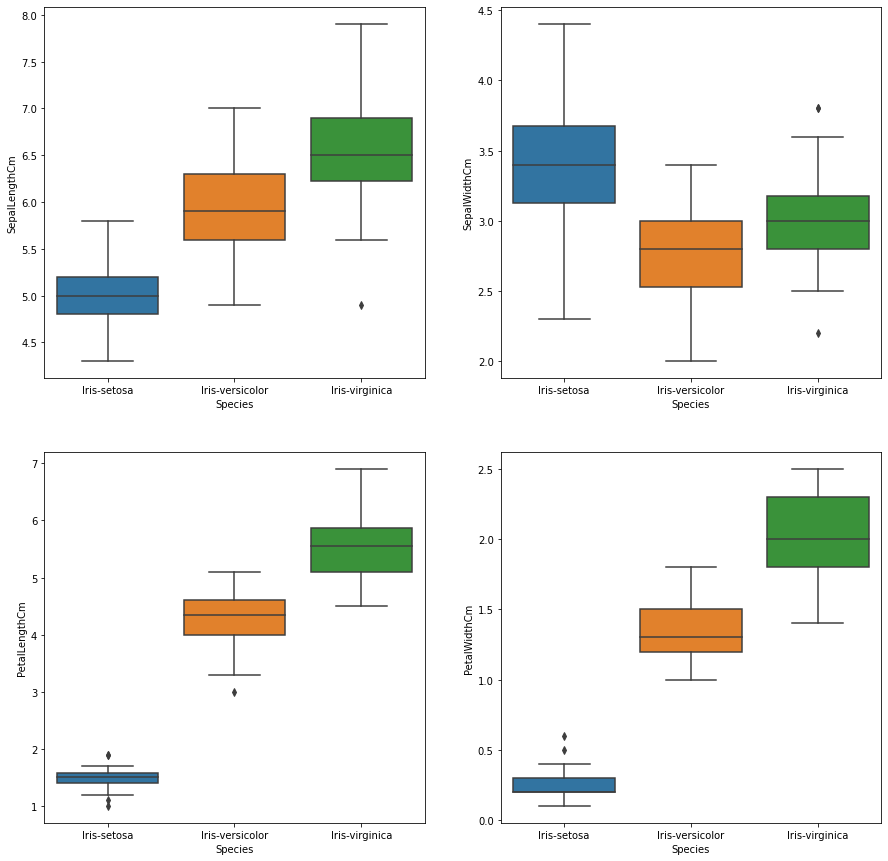

In [23]:
# Using BoxPlots to visualize statistical data

column_list = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2,2, figsize=(15,15))
axes_flat = axes.flatten()

index = 0
for axis in axes_flat:
    sns.boxplot(x='Species', y=column_list[index], data=raw_data, ax=axis)
    index += 1

plt.show()

The above graphs (boxplots) verify the statistical analysis made eariler.